## Assignment: Titanic Dataset 
The Titanic dataset is a well-known dataset in the field of data science and machine learning. It contains information about the passengers who were on board the Titanic when it sank, including their age, gender, class, and whether or not they survived. The goal of this assignment is to prepare the Titanic dataset.

### Introduction
In this assignment, you will be working with the Titanic dataset, which contains information about passengers on the Titanic, including whether or not they survived. Your task is to preprocess the data, convert all data to numeric data for scikit-learn, and perform feature selection using the f_classif() function. Additionally, you will calculate the Pearson correlation coefficient between each pair of features in the dataset to identify any highly correlated features.

### Data Preprocessing
1. Load the Titanic dataset into a Pandas DataFrame. 
2. Check for missing values and fill them in appropriately.
3. Convert non-numeric data to numeric data using the get_dummies() function from Pandas. Be sure to exclude any columns that won't be used for analysis (e.g. PassengerId, Name, Ticket, Cabin).

### Feature Selection
1. Split the dataset as shown in the code below. 
2. Fit a decision tree classifier to the training set using the DecisionTreeClassifier() class from 
3. Calculate the f-score and p-values for each feature in the dataset using the f_classif() function from scikit-learn. Print out the f-score and p-value for each feature.
4. Calculate the Pearson correlation coefficient between each pair of features in the dataset using the corr() function from Pandas. Print out the correlation coefficient and the p-value for any pair of features that have a statistically significant correlation (p-value less than 0.05).

### Deliverables
A Jupyter notebook containing your code and comments.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from scipy.stats import pearsonr


In [3]:
# Load the Titanic Dateset
data = pd.read_csv('titanic.csv')

In [5]:
# Explore the dataset and identify any missing values using isnul().sum() 
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
# Fill in any missing values with appropriate values (e.g., mean or median values).
# using fillna() to fill the median() values for missing values for feature Age
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

/var/folders/td/8g88g5n92rx4k2lfcb48b7b00000gn/T/ipykernel_32473/3914099338.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
/var/folders/td/8g88g5n92rx4k2lfcb48b7b00000gn/T/ipykernel_32473/3914099338.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

In [7]:
# Apply one-hot encoding to non-numeric features (Sex and Embarked) usin gthe .get_dummies method

data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [8]:
# Display top 10 lines from the dataset 

data.head(10)


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",33.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True
5,6,0,3,"Moran, Mr. James",28.0,0,0,330877,8.4583,NaN,True,True,False
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,True,False,True
7,8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,True,False,True
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,False,False,True
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",14.0,1,0,237736,30.0708,NaN,False,False,False


In [9]:
# Split the dataset into features (X) and label (y)
X = data.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = data['Survived']

In [10]:
# Display X dataframe info() with features
print(X.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Age         891 non-null    float64
 2   SibSp       891 non-null    int64  
 3   Parch       891 non-null    int64  
 4   Fare        891 non-null    float64
 5   Sex_male    891 non-null    bool   
 6   Embarked_Q  891 non-null    bool   
 7   Embarked_S  891 non-null    bool   
dtypes: bool(3), float64(2), int64(3)
memory usage: 37.5 KB
None


In [11]:
# Display X dataframe info() with features
print(X.head())

   Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  Embarked_S
0       3  33.0      1      0   7.2500      True       False        True
1       1  38.0      1      0  71.2833     False       False       False
2       3  26.0      0      0   7.9250     False       False        True
3       1  35.0      1      0  53.1000     False       False        True
4       3  35.0      0      0   8.0500      True       False        True


In [12]:
# Calculate the F-scores and p-values for each numeric feature using f_classif()
f_scores, p_values = f_classif(X.select_dtypes(include='number'), y)

In [ ]:
# Calculate the f-score and p-values for each feature in the dataset
for i, feature in enumerate(X.columns):
    print("Feature:", feature)
    print("F-score:", f_scores[i])
    print("P-value:", p_values[i])
    print("------------------------")

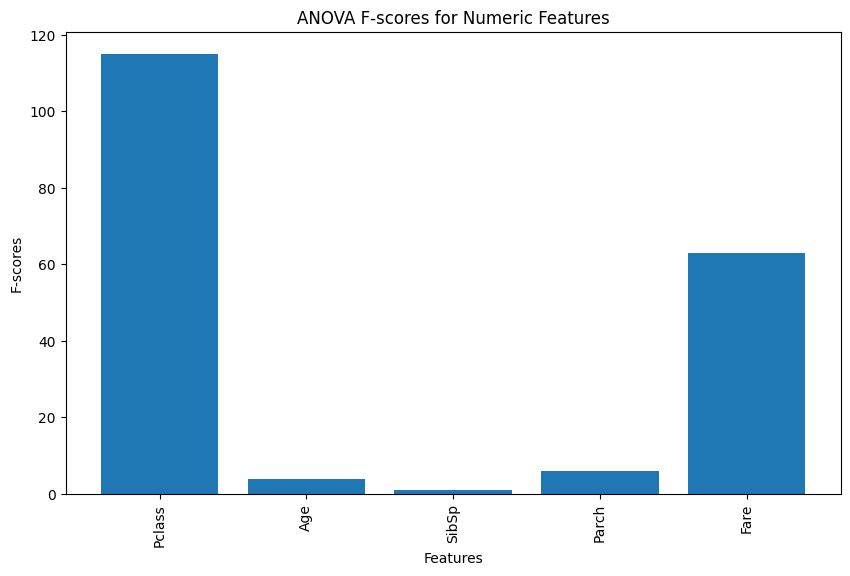

In [13]:
# Create a bar chart to visualize the F-scores for each numeric feature
# Change this code as needed
plt.figure(figsize=(10, 6))
plt.bar(X.select_dtypes(include=np.number).columns, f_scores)
plt.title('ANOVA F-scores for Numeric Features')
plt.xlabel('Features')
plt.ylabel('F-scores')
plt.xticks(rotation=90)
plt.show()

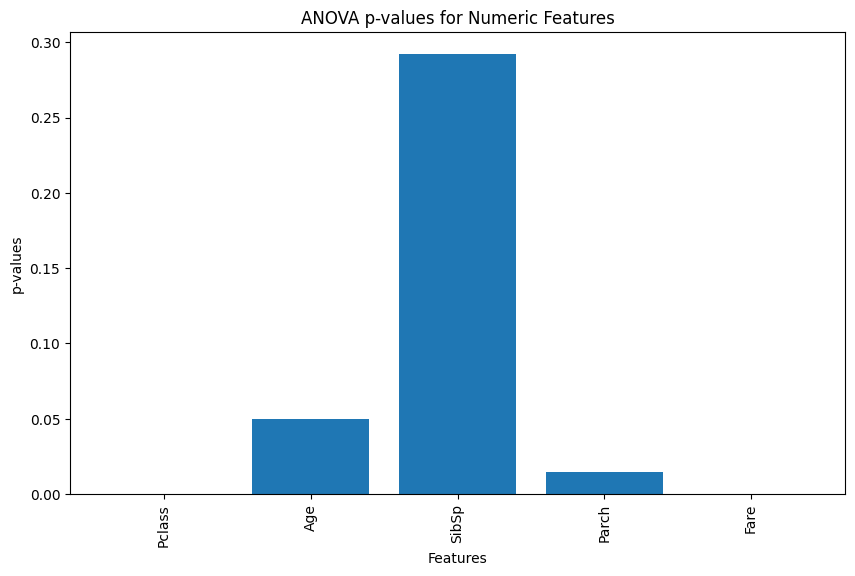

In [14]:
# Create a bar chart to visualize the p-values for each numeric feature
# Change this code as needed

plt.figure(figsize=(10, 6))
plt.bar(X.select_dtypes(include=np.number).columns, p_values)
plt.title('ANOVA p-values for Numeric Features')
plt.xlabel('Features')
plt.ylabel('p-values')
plt.xticks(rotation=90)
plt.show()

# Analyze the results and write a a few lines discussing the following:
# * Which numeric features have the highest F-scores? What does this indicate about their relationship with the target variable?
# * Which numeric features have the lowest p-values? What does this indicate about their significance?
# * Based on your analysis, which numeric features do you think are the most important for predicting the target variable?


Pclass - f-score: 115.03127218827744, p-value: 2.537047387979699e-25
Age - f-score: 3.850248832072658, p-value: 0.05005021626759948
SibSp - f-score: 1.1105722041132329, p-value: 0.2922439286981904
Parch - f-score: 5.963463836603494, p-value: 0.014799245374722386
Fare - f-score: 63.03076422804438, p-value: 6.120189341922221e-15
Sex_male - f-score: 372.40572360221483, p-value: 1.406066130879597e-69
Embarked_Q - f-score: 0.011846343990383331, p-value: 0.9133532352434973
Embarked_S - f-score: 20.374459882803, p-value: 7.223240983686353e-06


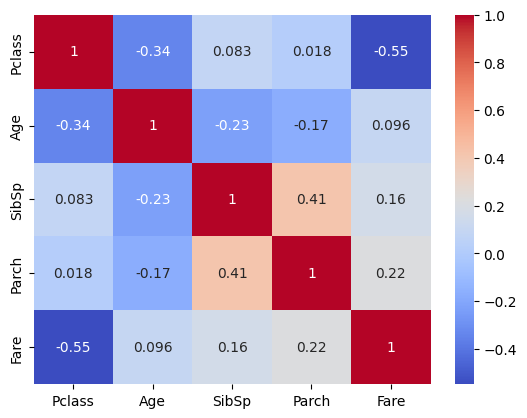

In [16]:
# Calculate the f-score and p-values for each feature in the dataset
# Analyze the results and write a a few lines discussing the findings

f_score, p_value = f_classif(X, y)
for i, col in enumerate(X.columns):
    print(f"{col} - f-score: {f_score[i]}, p-value: {p_value[i]}")

# Calculate the Pearson correlation coefficient between each pair of features in the dataset
# Use the .corr() method
corr_matrix = X.select_dtypes(include='number').corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()